In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('diabeties.csv')
df.head()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()


pregnant     0
glocose      0
bp           0
skin         0
insulin      0
bmi          0
predigree    0
age          0
target       0
dtype: int64

In [5]:
df.describe()


,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['target'].value_counts()

0    500
1    268
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

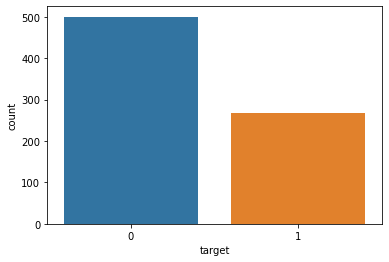

In [9]:
sns.countplot(data=df,x="target")

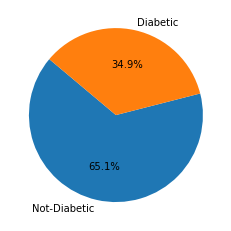

In [15]:
plt.pie(df["target"].value_counts(), labels=["Not-Diabetic","Diabetic"],autopct='%1.1f%%', startangle=140)
plt.show()

<AxesSubplot:xlabel='pregnant', ylabel='count'>

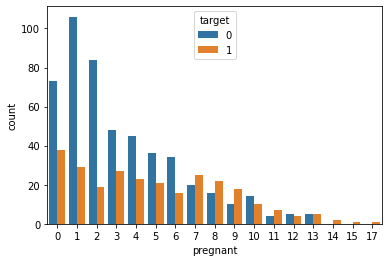

In [16]:
sns.countplot(data=df,x='pregnant',hue="target")

<AxesSubplot:>

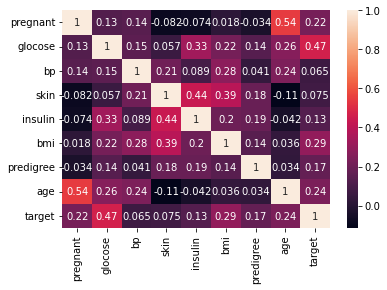

In [17]:
sns.heatmap(df.corr(), annot=True)

In [18]:
df.groupby('target').mean()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age
target,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [19]:
for i in ["glocose","bp","skin","insulin","bmi"]:
 df[i].replace(0,np.nan,inplace=True)
 df[i].fillna(df[i].mean(),inplace=True)

In [20]:
df.describe()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [22]:
x

,glocose,bp,skin,insulin,bmi,predigree,age
0,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [23]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: target, Length: 768, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)
X = standardized_data
Y = df['target']

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"Accuracy:{ac}\n{cm}\n\n{cr}")

Accuracy:0.7864583333333334
[[107  16]
 [ 25  44]]

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       123
           1       0.73      0.64      0.68        69

    accuracy                           0.79       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.78      0.79      0.78       192



In [28]:
train=logreg.score(xtrain,ytrain)
test=logreg.score(xtest,ytest)
print(f"Training Score :{train}\nTesting Score:{test}")

Training Score :0.7708333333333334
Testing Score:0.7864583333333334


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred1=knn.predict(xtest)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"Accuracy:{ac}\n{cm}\n\n{cr}")

Accuracy:0.7864583333333334
[[107  16]
 [ 25  44]]

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       123
           1       0.73      0.64      0.68        69

    accuracy                           0.79       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.78      0.79      0.78       192



In [31]:
knn_list=[]
for i in range(1,31):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(xtrain,ytrain)
 ypred=knn.predict(xtest)
 ac=accuracy_score(ytest,ypred)
 knn_list.append(ac)

In [32]:
knn_list

[0.7291666666666666,
 0.7447916666666666,
 0.734375,
 0.75,
 0.7552083333333334,
 0.7604166666666666,
 0.765625,
 0.7447916666666666,
 0.765625,
 0.7708333333333334,
 0.7447916666666666,
 0.765625,
 0.765625,
 0.7604166666666666,
 0.7916666666666666,
 0.7916666666666666,
 0.8072916666666666,
 0.796875,
 0.7916666666666666,
 0.8020833333333334,
 0.796875,
 0.7760416666666666,
 0.7708333333333334,
 0.78125,
 0.7864583333333334,
 0.7604166666666666,
 0.7708333333333334,
 0.7916666666666666,
 0.7864583333333334,
 0.7760416666666666]

In [33]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(xtrain,ytrain)
ypred2=knn.predict(xtest)


In [34]:
accuracy_score(ytest,ypred2)

0.8072916666666666

In [40]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(xtrain,ytrain)


SVC()

In [41]:
train = svm.score(xtrain,ytrain)
test = svm.score(xtest,ytest)
print(f"Training Accuracy:- {train}\n Testing Accuracy:- {test}")

Training Accuracy:- 0.765625
 Testing Accuracy:- 0.765625
